In [1]:
import numpy as np
from numpy import random
from scipy.stats import dirichlet
from scipy.stats import bernoulli
random.seed(10)
alpha = np.array([40, 40, 40, 40])
beta=np.array([40,40,40])
n_1=7 #number of the rows of \Pi_P
n_2=5000 #number of the rows of \Pi_d
Pi_p=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0],[0.3,0.4,0.3,0],[0.2,0.5,0.1,0.2]])
Pi_d=random.multinomial(n=1, pvals=[0.35,0.4,0.25],size=n_2)
P=np.array([[0.5, 0.7, 0.2], [0.8,0.3,0.1], [0.2,0.6,0.4], [0.6,0.3,0.5]])
EX_1=Pi_p@P@Pi_d.T

In [2]:
X_1=np.zeros((n_1,n_2))

In [3]:
from tqdm import tqdm
X_1=bernoulli.rvs(EX_1,size=(n_1,n_2))

In [4]:
T=4000000 #bootstrap_iteration_number
U_bootstrap_1=np.zeros( (T,3) )#first patient
U_bootstrap_2=np.zeros((T,3)) #fifth patient
U_bootstrap=np.zeros((T,3))#differentiable
for k in tqdm(range(T)):
    the_list=np.random.randint(0,n_2,n_2)
    X_sample=X_1[:,the_list]
    U,S,Vh=np.linalg.svd(X_sample,full_matrices=False)
    for j in range(0,3):
        if U[0,j]<0:
            U[:,j]=-U[:,j]#make sure that the first 3 left-singular vectors are unique 
        elif U[0,j]==0 and U[1,j]<0:
            U[:,j]=-U[:,j]
        elif U[0,j]==0 and U[1,j]==0 and U[2,j]<0:
            U[:,j]=-U[:,j]
        elif U[0,j]==0 and U[1,j]==0 and U[2,j]==0 and U[3,j]<0:
            U[:,j]=-U[:,j]
        elif U[0,j]==0 and U[1,j]==0 and U[2,j]==0 and U[3,j]==0 and U[4,j]<0:
            U[:,j]=-U[:,j]
                    
                
            
    U_bootstrap[k]=U[0,0:3]-U[4,0:3]


100%|██████████████████████████████████████████████████████████████████████| 4000000/4000000 [51:06<00:00, 1304.48it/s]


In [5]:
U_bootstrap_mean=np.mean(U_bootstrap,axis=0)

In [6]:
U_bootstrap_zero=U_bootstrap-U_bootstrap_mean

In [7]:
cov_estimate=U_bootstrap_zero.T@U_bootstrap_zero*(1/T)

In [8]:
cov_estimate

array([[ 6.03454280e-05, -7.92452345e-05, -5.80338831e-05],
       [-7.92452345e-05,  2.16032896e-03, -7.61145126e-04],
       [-5.80338831e-05, -7.61145126e-04,  1.46831725e-02]])

In [9]:
import numpy as np
from numpy import random
from scipy.stats import dirichlet
from scipy.stats import bernoulli
alpha = np.array([40, 40, 40, 40])
beta=np.array([40,40,40])
T2=100000
U_true=np.zeros( (T2,3) )
U_true_1=np.zeros((T2,3))
U_true_2=np.zeros((T2,3))
Pi_d_huge=random.multinomial(n=1, pvals=[0.35,0.4,0.25],size=n_2*T2)
Pi_d_huge.size


1500000000

In [10]:
import numpy as np
from numpy import random
from scipy.stats import dirichlet
from scipy.stats import bernoulli
random.seed(10)

In [11]:
from tqdm import tqdm
for k in tqdm(range(T2)):
    EX_1_k=Pi_p@P@Pi_d_huge[k*n_2:(k+1)*n_2].T
    
    X_1_k=bernoulli.rvs(EX_1_k,size=(n_1,n_2))
    U_true_,S,Vh=np.linalg.svd(X_1_k,full_matrices=False)
    for j in range(0,3):
        if U_true_[0,j]<0:
            U_true_[:,j]=-U_true_[:,j]#make sure that the first 3 left-singular vectors are unique 
        elif U_true_[0,j]==0 and U_true_[1,j]<0:
            U_true_[:,j]=-U_true_[:,j]
        elif U_true_[0,j]==0 and U_true_[1,j]==0 and U_true_[2,j]<0:
            U_true_[:,j]=-U_true_[:,j]
        elif U_true_[0,j]==0 and U_true_[1,j]==0 and U_true_[2,j]==0 and U_true_[3,j]<0:
            U_true_[:,j]=-U_true_[:,j]
        elif U_true_[0,j]==0 and U_true_[1,j]==0 and U_true_[2,j]==0 and U_true_[3,j]==0 and U_true_[4,j]<0:
            U_true_[:,j]=-U_true_[:,j]
    U_true[k]=U_true_[0,0:3]-U_true_[4,0:3]

U_true_mean=np.mean(U_true,axis=0)
U_true_zero=U_true-U_true_mean
cov_true_estimate=U_true_zero.T@U_true_zero*(1/T2)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [04:02<00:00, 411.72it/s]


In [12]:
cov_true_estimate

array([[ 5.93839343e-05, -7.12017935e-05, -5.25350651e-05],
       [-7.12017935e-05,  1.96221777e-03, -7.35962427e-04],
       [-5.25350651e-05, -7.35962427e-04,  9.10488585e-03]])

In [13]:
import math
a=0
b=0
c=0
for i in range(3):
    for j in range(3):
        a+=cov_estimate[i][j]*cov_true_estimate[i][j]
        b+=cov_estimate[i][j]**2
        c+=cov_true_estimate[i][j]**2
cos=a/(math.sqrt(b)*math.sqrt(c))
print(cos)

0.9970637796558357


In [14]:
import sys
sys.path.insert(1,'C:/Users/hhz13/Downloads/ITE-1.1_code')
import ite
co=ite.cost.MDKL_HSCE()
estimate_kafang=np.zeros((100000,1))
for i in range(100000):
    estimate_kafang[i][0]=(U_true[i])@np.linalg.inv(cov_estimate)@(U_true[i]).T

In [15]:
np.mean(U_true)

0.0003257900954626885

In [16]:
from numpy import random
kafang_groundtruth=random.chisquare(df=3, size=100000)
print(kafang_groundtruth)
kafang_groundtruth_vector=np.zeros((100000,1))
for j in range(100000):
    kafang_groundtruth_vector[j][0]=kafang_groundtruth[j]

[3.31870272 1.4840989  4.04651752 ... 1.15605295 2.91741023 1.65565651]


In [17]:
co.estimation(kafang_groundtruth_vector,estimate_kafang)

0.020854785659514263

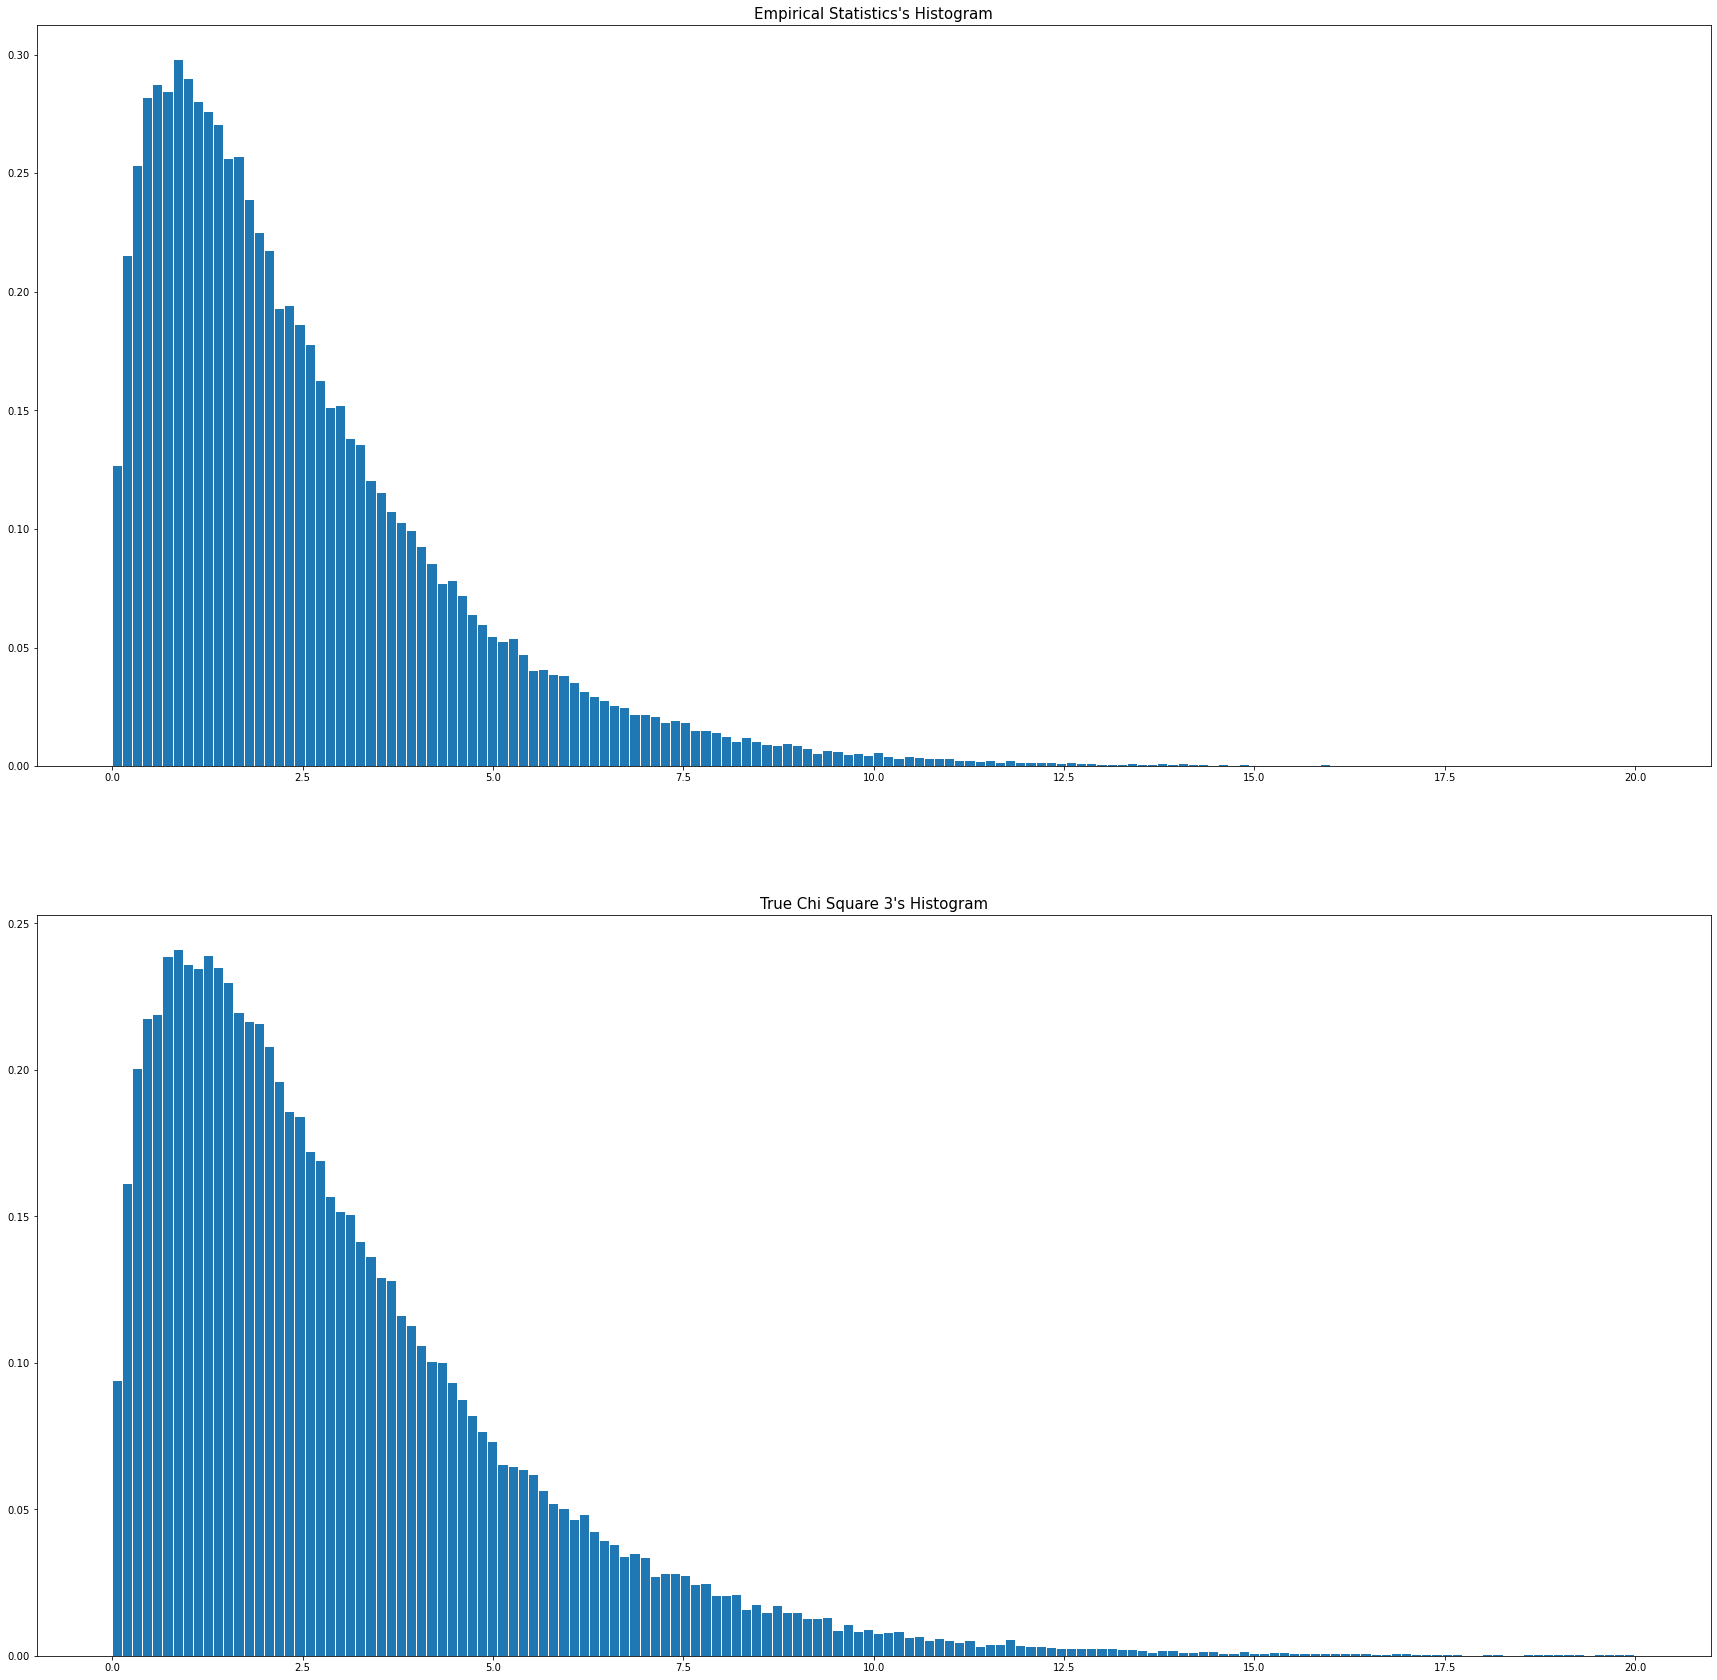

In [18]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,1,figsize=(30,30))
axs[0].hist(estimate_kafang[:,0], range=(0,20),bins=150, rwidth=0.9, density=True)
axs[0].set_title("Empirical Statistics's Histogram",fontsize=15)
axs[1].hist(kafang_groundtruth, range=(0,20),bins=150, rwidth=0.9, density=True)
axs[1].set_title("True Chi Square 3's Histogram",fontsize=15)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Bootstrap_Experiment.eps', format='eps', dpi=1000)